In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [49]:
data = pd.read_csv("dataset_website.csv")

In [3]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [4]:
data.shape

(11055, 32)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   index                        11055 non-null  int64
 1   having_IPhaving_IP_Address   11055 non-null  int64
 2   URLURL_Length                11055 non-null  int64
 3   Shortining_Service           11055 non-null  int64
 4   having_At_Symbol             11055 non-null  int64
 5   double_slash_redirecting     11055 non-null  int64
 6   Prefix_Suffix                11055 non-null  int64
 7   having_Sub_Domain            11055 non-null  int64
 8   SSLfinal_State               11055 non-null  int64
 9   Domain_registeration_length  11055 non-null  int64
 10  Favicon                      11055 non-null  int64
 11  port                         11055 non-null  int64
 12  HTTPS_token                  11055 non-null  int64
 13  Request_URL                  11055 non-null  i

In [6]:
data.isnull().sum()

index                          0
having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistica

## *UNIVARIATE ANALYSIS*

In [ ]:
data['Result'].value_counts()

 1    6157
-1    4898
Name: Result, dtype: int64

In [ ]:
data_phish = data.loc[data['Result'] == -1]
data_no_phish = data.loc[data['Result'] == 1]

In [ ]:
data['DNSRecord'].value_counts()

 1    7612
-1    3443
Name: DNSRecord, dtype: int64

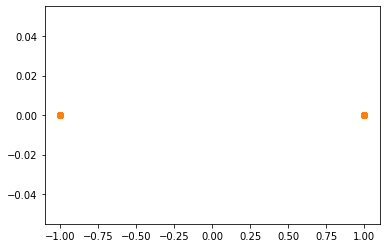

In [ ]:
plt.plot(data_phish['DNSRecord'], np.zeros_like(data_phish['DNSRecord']),'o')
plt.plot(data_no_phish['DNSRecord'], np.zeros_like(data_no_phish['DNSRecord']),'o')
plt.show()

## *BIVARIATE ANALYSIS*

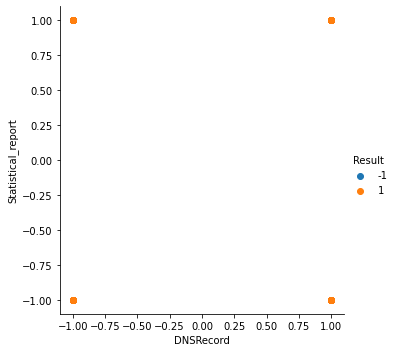

In [ ]:
sns.FacetGrid(data, hue = 'Result', height=5).map(plt.scatter,'DNSRecord','Statistical_report').add_legend()
plt.show()

## *MULTIVARIATE ANALYSIS*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


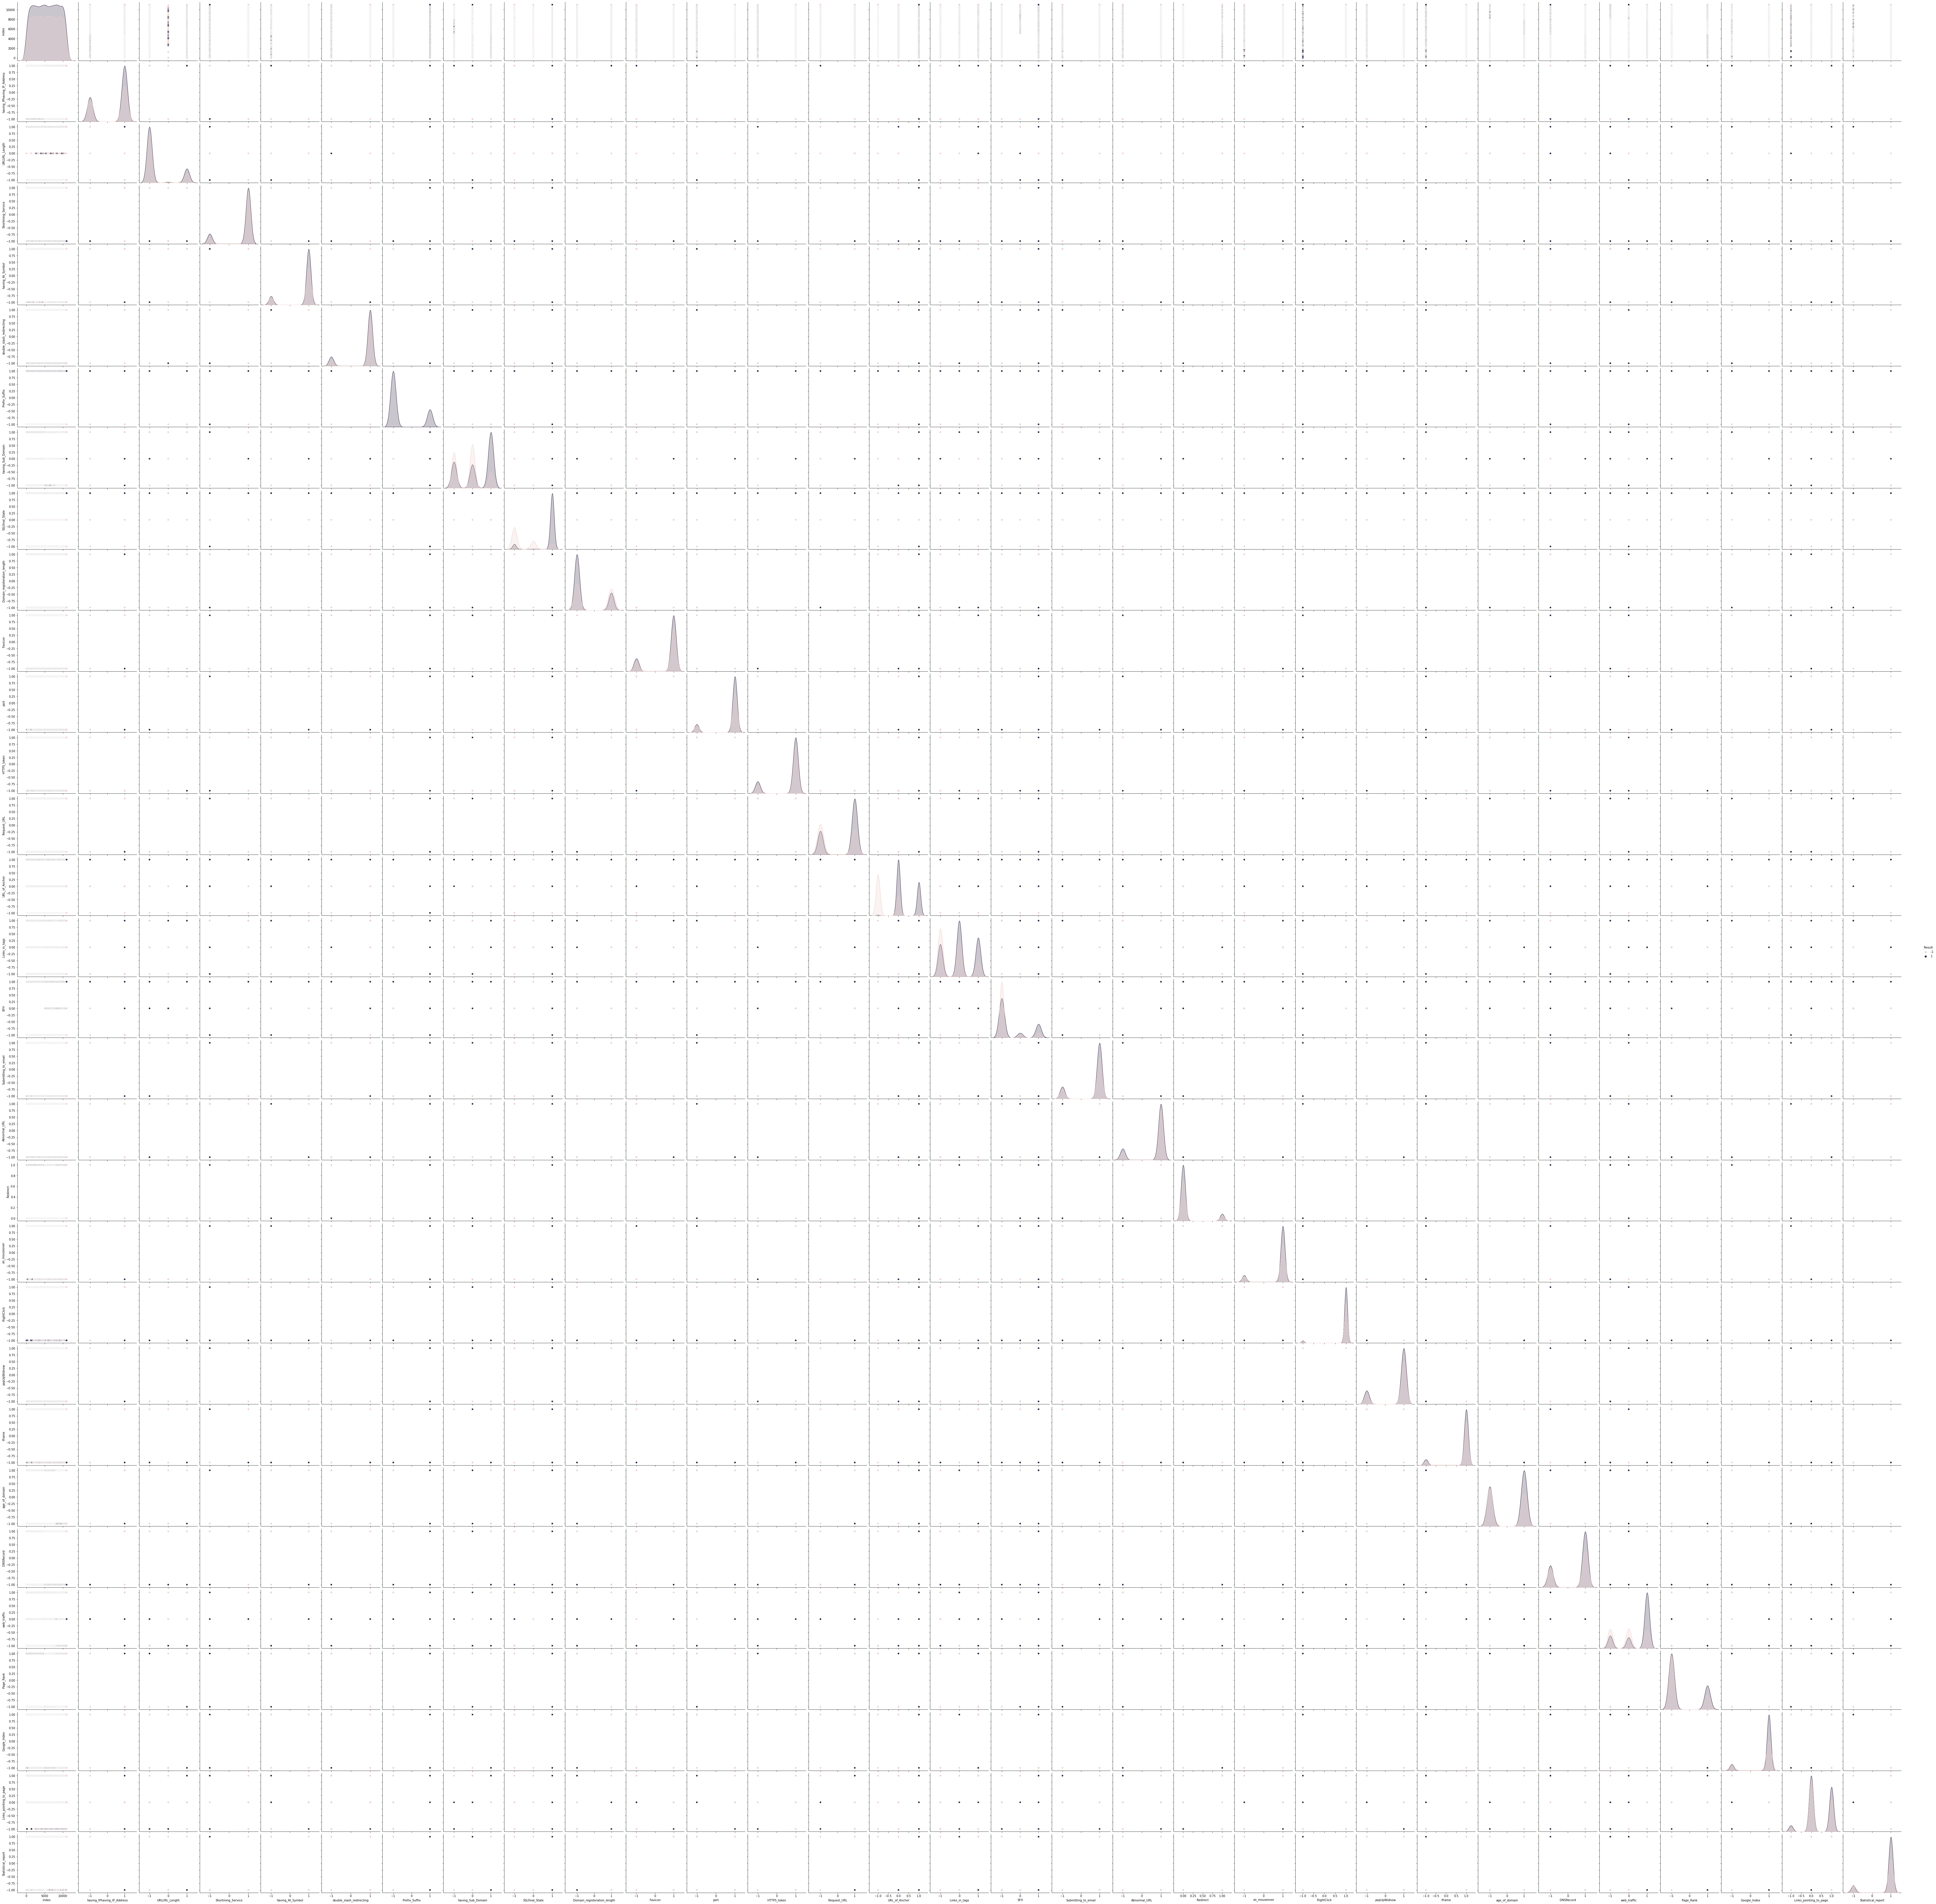

In [ ]:
sns.pairplot(data, hue='Result',size=3)

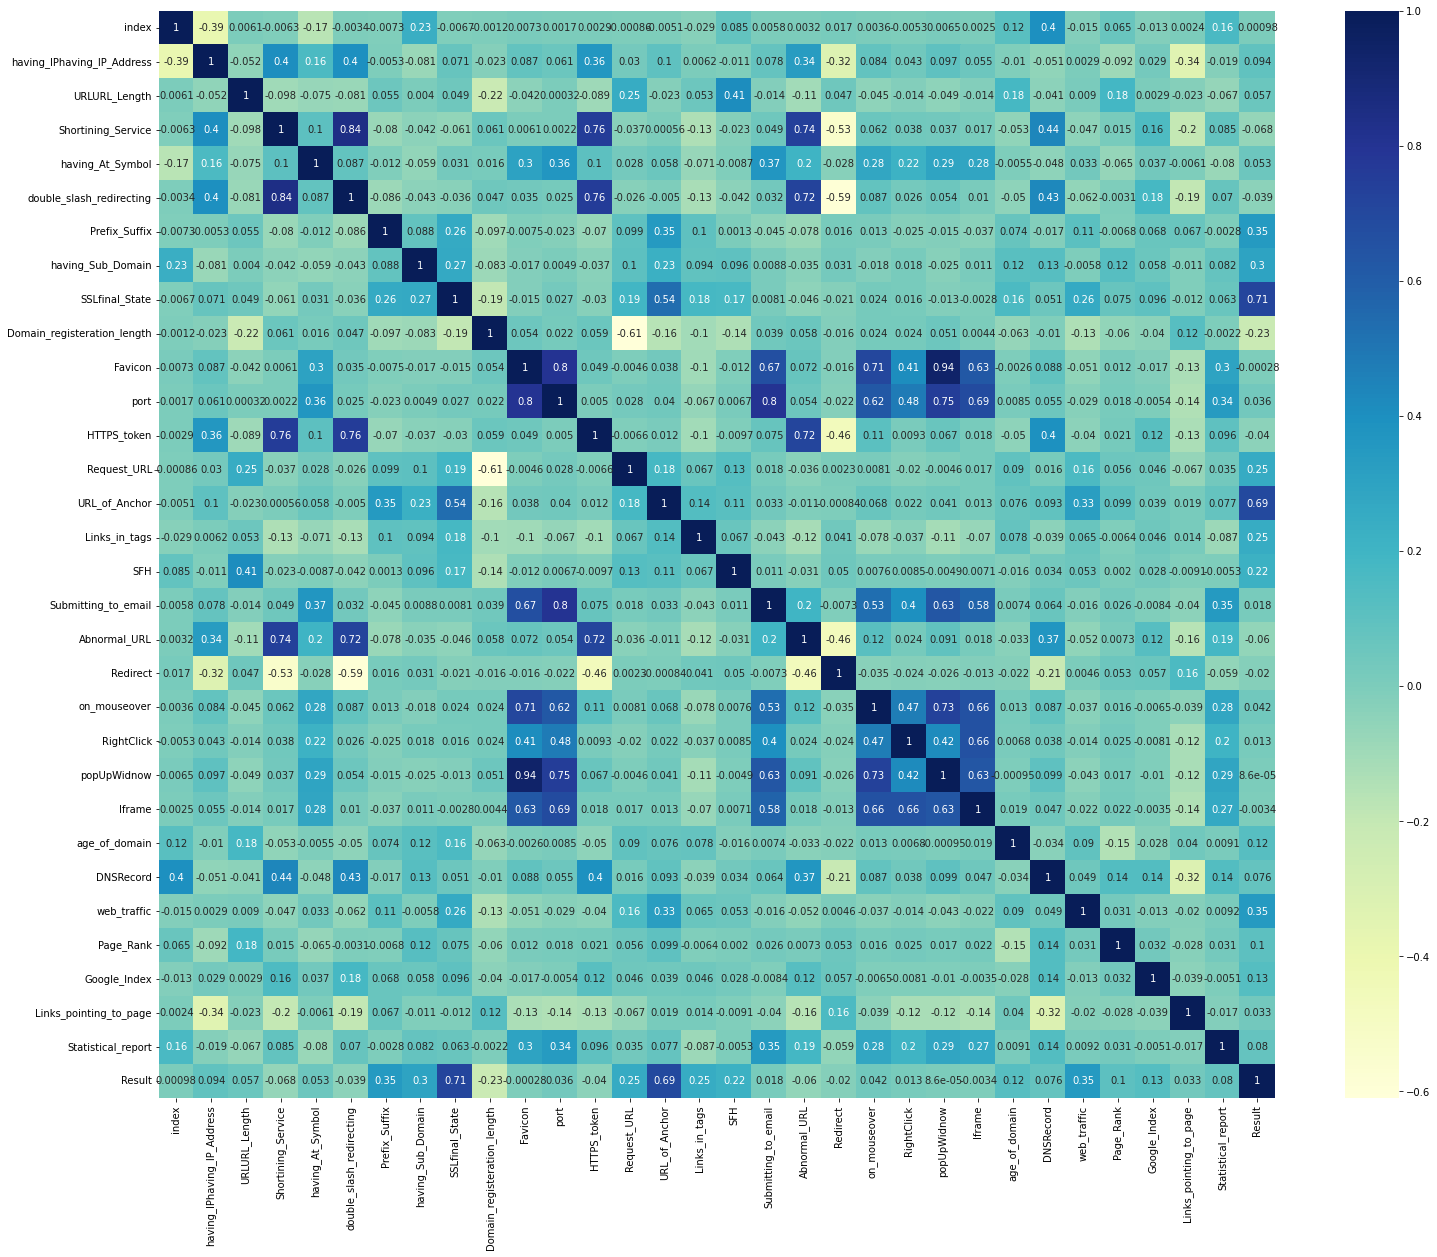

In [ ]:
fig, ax = plt.subplots(figsize=(25, 20))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

##*FEATURE EXTRACTION*##

In [29]:
new_df = data.drop(['index'], axis=1)

In [30]:
new_df.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [31]:
xx = new_df.drop(['Result'], axis = 1)
y = new_df['Result']

In [32]:
xx.head()

,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,RightClick,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,1,-1,-1,-1,-1,1,1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,1,-1,-1,0,-1,1,1,1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,1,-1,1,-1,1,0,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,1,-1,-1,1,-1,1,-1,1
4,1,0,-1,1,1,-1,1,1,-1,1,...,1,-1,1,-1,-1,0,-1,1,1,1


In [34]:
y.head()

0   -1
1   -1
2   -1
3   -1
4    1
Name: Result, dtype: int64

##***TRAINING, TESTING DATA WITH MODEL BUILDING***##

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size = 0.3, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression 

In [ ]:
LR = LogisticRegression()

In [ ]:
clf = LR.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
acc_sc = accuracy_score(y_test, y_pred)

In [ ]:
acc_sc

0.9204100090443171

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
mode = dc.fit(x_train, y_train)

In [ ]:
y_pred_dc = dc.predict(x_test)

In [ ]:
acc_sc_dc = accuracy_score(y_test, y_pred_dc)

In [ ]:
acc_sc_dc

0.9508592101296353

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import math


neigh = KNeighborsClassifier(n_neighbors=3)
mode_neigh = neigh.fit(x_train, y_train)

In [ ]:
y_pred_neigh = neigh.predict(x_test)

In [ ]:
acc_sc_neigh = accuracy_score(y_test, y_pred_neigh)

In [ ]:
acc_sc_neigh

0.621043111245101

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
mode_rf = rf.fit(x_train, y_train)

In [37]:
y_pred_rf = mode_rf.predict(x_test)

In [38]:
acc_sc_rf = accuracy_score(y_test, y_pred_rf)

In [39]:
acc_sc_rf

0.9680434127223395

In [ ]:
from sklearn.svm import SVC
svc = SVC()
mode_svc = svc.fit(x_train, y_train)

In [ ]:
y_pred_svc = svc.predict(x_test)
acc_sc_svc = accuracy_score(y_test, y_pred_svc)
acc_sc_svc

0.5694905034669883

In [ ]:
from xgboost import XGBClassifier
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(x_train, y_train)

XGBClassifier(learning_rate=0.001, max_depth=5, n_estimators=100000, n_jobs=-1)

In [ ]:
y_pred_x = xgc.predict(x_test)
acc_sc_x = accuracy_score(y_test, y_pred_x)
acc_sc_x

0.9662345492915285

In [14]:
import pickle

In [40]:
with open('model','wb') as f:
  pickle.dump(mode_rf,f)